# **Linear Regression, Ridge Regression, and LASSO**

## Problem statement:

Implement Linear Regression, Ridge Regression, and LASSO algorithms on a small data set, e.g. the Boston Housing
Dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.
load_boston.html), and compare the performance of each algorithm.

## Loading the Boston Housing Dataset

In [ ]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


In [ ]:
print(y.shape)

(506,)


In [ ]:
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [ ]:
from sklearn.preprocessing import normalize
X=normalize(X, axis=0)

In [ ]:
print(X)

[[3.01395767e-05 3.08684289e-02 7.85307229e-03 ... 3.66039256e-02
  4.79270479e-02 1.52411958e-02]
 [1.30239215e-04 0.00000000e+00 2.40351606e-02 ... 4.25849592e-02
  4.79270479e-02 2.79727972e-02]
 [1.30143837e-04 0.00000000e+00 2.40351606e-02 ... 4.25849592e-02
  4.74355813e-02 1.23337388e-02]
 ...
 [2.89759602e-04 0.00000000e+00 4.05572088e-02 ... 5.02406823e-02
  4.79270479e-02 1.72611133e-02]
 [5.22625983e-04 0.00000000e+00 4.05572088e-02 ... 5.02406823e-02
  4.75104484e-02 1.98319175e-02]
 [2.26094515e-04 0.00000000e+00 4.05572088e-02 ... 5.02406823e-02
  4.79270479e-02 2.41165910e-02]]


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)
X

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(X, y, test_size=0.20)

In [ ]:
print(train_data.shape)
print(test_data.shape)
train_label = train_label.reshape(-1,1)
print(train_label.shape)
test_label = test_label.reshape(-1,1)
print(test_label.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [ ]:
# train_data = sklearn.preprocessing.scale(train_data, axis=0, with_mean=True, 
# with_std=True, copy=True)

# test_data = sklearn.preprocessing.scale(test_data, axis=0, with_mean=True, 
# with_std=True, copy=True)

In [ ]:
import numpy as np

In [ ]:
a = np.array([[1,-2,-3],[4,-5,6],[-7,8,9]])
a

array([[ 1, -2, -3],
       [ 4, -5,  6],
       [-7,  8,  9]])

In [ ]:
np.sign(a)

array([[ 1, -1, -1],
       [ 1, -1,  1],
       [-1,  1,  1]])

## Regression Models

### **1. Linear Regression**

In [ ]:
def Regression_Predict(X,W):
  return np.dot(X, W)

In [ ]:
#The Mean Square Error.
def Linear_Cost(X,Y,W):
    return (W.T @ X.T @ X @ W - 2 * (W.T @ X.T @ Y) + Y.T @ Y)[0]
def Loss(y,ypred):
    l=(y-ypred)**2
    return(l.sum())
#The Mean Square Error.
def MSE(X,Y,W):
    return((1/X.shape[0])*Loss(Y,Regression_Predict(X,W))) * 0.0001

In [ ]:
def Linear_MGD(X,Y,learnRate=0.001,epochs=40):
    
   # Random Initialization of Weights
    lin_weights=np.random.rand(X.shape[1])
    
    lin_weights=np.array(lin_weights)
    lin_weights=lin_weights.reshape(-1,1)
    m=X.shape[0]

    # Code to get batches for Stochastic Gradient Descent
    # batch size
    batch_size = 32
    from numpy import random
    random_ids = random.choice(m,m,replace=False)
    X_shuffled = X[random_ids,:]
    y_shuffled = Y[random_ids]

    lin_error = []
    
    for i in range(epochs):
        mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, m, batch_size)]

        for batch in mini_batches:        
            X_batch = batch[0]
            Y_batch = batch[1]
          #   print("Before")
          #  # print(lin_weights)
          #   print(lin_weights.shape)
          #  # print(X_batch)
          #   print(X_batch.shape)
          #  # print(Y_batch)
          #   print(Y_batch.shape)
            lin_weights = lin_weights - 2 * learnRate * (X_batch.T @ X_batch @ lin_weights - X_batch.T @ Y_batch )
          #   print("After")
          #  # print(lin_weights)
          #   print(lin_weights.shape)
          #   #print(X_batch)
          #   print(X_batch.shape)
          #   #print(Y_batch)
          #   print(Y_batch.shape)
            lin_error.append(Linear_Cost(X_batch,Y_batch,lin_weights) )
    return(lin_weights, lin_error)

In [ ]:
lin_weights, lin_error = Linear_MGD(train_data,train_label)

In [ ]:
lin_test_pred = Regression_Predict(test_data ,lin_weights)

In [ ]:
MSE(test_data,test_label,lin_weights )

21.0060543102941

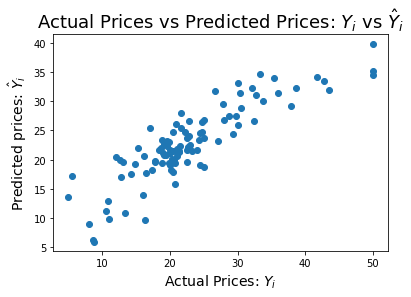

In [ ]:
# Plotting the Scatter plot of Actual Price VS Predicted Price
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(test_label, lin_test_pred)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

In [ ]:
len(lin_error)

520

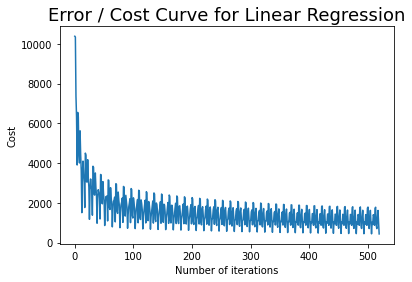

In [ ]:
import matplotlib.pyplot as plt
#visualizing the change in error function
plt.plot(lin_error) 
plt.title("Error / Cost Curve for Linear Regression",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

### **2. Ridge Regression**

In [ ]:
#The Mean Square Error.
def Ridge_Cost(X,Y,W, ld):
    return (W.T @ X.T @ X @ W - 2 * (W.T @ X.T @ Y) + Y.T @ Y + ld * (W.T @ W))[0][0]

In [ ]:
def Ridge_MGD(X,Y,learnRate=0.001,epochs=30,reg=0, ld=0.1):
    
   # Random Initialization of Weights
    rid_weights=np.random.rand(X.shape[1])
    
    rid_weights=np.array(rid_weights)
    rid_weights=rid_weights.reshape(-1,1)
    m=X.shape[0]

    # Code to get batches for Stochastic Gradient Descent
    # batch size
    batch_size = 20
    from numpy import random
    random_ids = random.choice(m,m,replace=False)
    X_shuffled = X[random_ids,:]
    y_shuffled = Y[random_ids]
    mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, m, batch_size)]
    rid_error = []
    
    for i in range(epochs):
        for batch in mini_batches:
            print(i)
            X_batch = batch[0]
            Y_batch = batch[1]
          #   print("Before")
          #  # print(rid_weights)
          #   print(rid_weights.shape)
          #  # print(X_batch)
          #   print(X_batch.shape)
          #  # print(Y_batch)
          #   print(Y_batch.shape)
            rid_weights = rid_weights - 2 * learnRate * (X_batch.T @ X_batch @ rid_weights - X_batch.T @ Y_batch + ld * rid_weights )
          #   print("After")
          #  # print(rid_weights)
          #   print(rid_weights.shape)
          #   #print(X_batch)
          #   print(X_batch.shape)
          #   #print(Y_batch)
          #   print(Y_batch.shape)
            rid_error.append(Ridge_Cost(X_batch,Y_batch,rid_weights,ld) )
    return(rid_weights, rid_error)

In [ ]:
rid_weights, rid_error =Ridge_MGD(train_data,train_label)
rid_test_pred = Regression_Predict (test_data, rid_weights)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
1

In [ ]:
MSE(test_data,test_label,rid_weights )

55.53465972319111

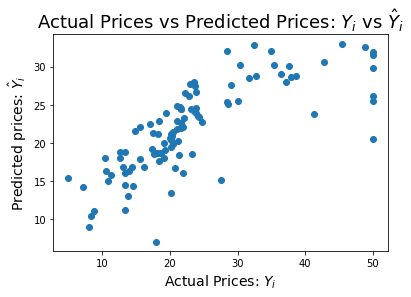

In [ ]:
# Plotting the Scatter plot of Actual Price VS Predicted Price
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(test_label, rid_test_pred)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

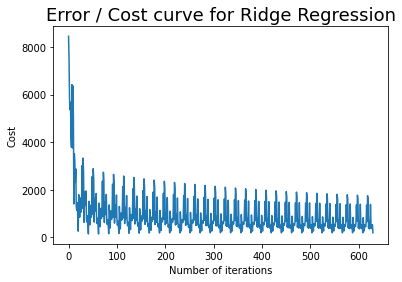

In [ ]:
import matplotlib.pyplot as plt
#visualizing the change in error function
plt.plot(rid_error) 
plt.title("Error / Cost curve for Ridge Regression",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

### **3. LASSO**

In [ ]:
#The Mean Square Error.
def Lasso_Cost(X,Y,W, ld):
    return (W.T @ X.T @ X @ W - 2 * (W.T @ X.T @ Y) + Y.T @ Y + ld * np.linalg.norm(W))[0][0]

In [ ]:
def Lasso_MGD(X,Y,learnRate=0.001,epochs=30,reg=0, ld=0.1):
    
   # Random Initialization of Weights
    las_weights=np.random.rand(X.shape[1])
    print(las_weights.shape)
    las_weights=np.array(las_weights)
    las_weights=las_weights.reshape(-1,1)
    m=X.shape[0]

    # Code to get batches for Stochastic Gradient Descent
    # batch size
    batch_size = 20
    from numpy import random
    random_ids = random.choice(m,m,replace=False)
    X_shuffled = X[random_ids,:]
    y_shuffled = Y[random_ids]
    mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, m, batch_size)]
    las_error = []
    
    for i in range(epochs):
        for batch in mini_batches:
            print(i)
            X_batch = batch[0]
            Y_batch = batch[1]
          #   print("Before")
          #  # print(las_weights)
          #   print(las_weights.shape)
          #  # print(X_batch)
          #   print(X_batch.shape)
          #  # print(Y_batch)
          #   print(Y_batch.shape)
            las_weights = las_weights - 2 * learnRate * (X_batch.T @ X_batch @ las_weights - X_batch.T @ Y_batch + ld * np.sign(las_weights) )
          #   print("After")
          #  # print(las_weights)
          #   print(las_weights.shape)
          #   #print(X_batch)
          #   print(X_batch.shape)
          #   #print(Y_batch)
          #   print(Y_batch.shape)
            las_error.append(Lasso_Cost(X_batch,Y_batch,las_weights,ld) )
    print(las_weights.shape)
    return(las_weights, las_error)

In [ ]:
las_weights, las_error = Lasso_MGD(train_data,train_label)
print(test_data.shape)
print(las_weights.shape)
las_test_pred = Regression_Predict(test_data, las_weights)

(13,)
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
1

In [ ]:
MSE(test_data,test_label,las_weights )

53.32452986795816

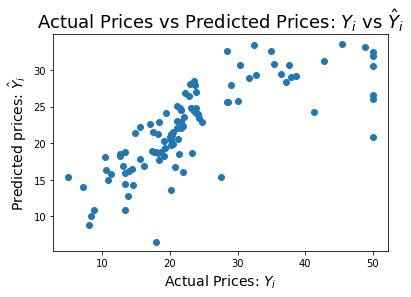

In [ ]:
# Plotting the Scatter plot of Actual Price VS Predicted Price
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(test_label, las_test_pred)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

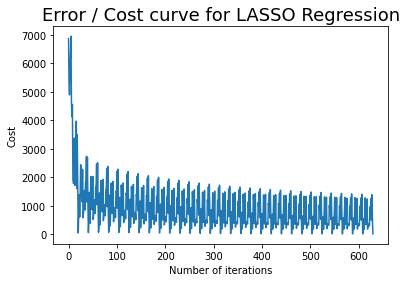

In [ ]:
import matplotlib.pyplot as plt
#visualizing the change in error function
plt.plot(las_error) 
plt.title("Error / Cost curve for LASSO Regression",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 